In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from pyspark.sql.types import *
from pyspark.sql import Row
import seaborn as sns
from pyspark import SparkContext
from pyspark import SQLContext

In [3]:

spark = SQLContext(sc)

In [4]:

df = spark.read.csv("abc.csv", inferSchema=True, header=True)


In [5]:
df.na.drop(how = "all")

DataFrame[Registrar: string, Enrolment Agency: string, State: string, District: string, Sub District: string, Pin Code: string, Gender: string, Age: int, Aadhaar generated: int, Enrolment Rejected: int, Residents providing email: int, Residents providing mobile number: int]

In [6]:
pd_df = df.toPandas()

In [7]:
pd_df.loc[pd_df['Aadhaar generated']>0,'Aadhaar generated'] = 1
pd_df.loc[pd_df['Enrolment Rejected']>0,'Enrolment Rejected'] = 1
pd_df.loc[pd_df['Residents providing mobile number']>0,'Residents providing mobile number'] = 1
pd_df['Gender'] = pd_df['Gender'].map( {'F': 0, 'M': 1,'T': 2} ).astype(int)
pd_df.loc[pd_df['Age']==0 ,'Age'] = np.NAN

In [8]:
df.show(2)

+--------------+--------------------+-------------+---------+------------+--------+------+---+-----------------+------------------+-------------------------+---------------------------------+
|     Registrar|    Enrolment Agency|        State| District|Sub District|Pin Code|Gender|Age|Aadhaar generated|Enrolment Rejected|Residents providing email|Residents providing mobile number|
+--------------+--------------------+-------------+---------+------------+--------+------+---+-----------------+------------------+-------------------------+---------------------------------+
|Allahabad Bank|A-Onerealtors Pvt...|Uttar Pradesh|Allahabad|        Meja|  212303|     F|  7|                1|                 0|                        0|                                1|
|Allahabad Bank|Asha Security Gua...|Uttar Pradesh|Sonbhadra| Robertsganj|  231213|     M|  8|                1|                 0|                        0|                                0|
+--------------+--------------------+---

In [9]:
df.printSchema()

root
 |-- Registrar: string (nullable = true)
 |-- Enrolment Agency: string (nullable = true)
 |-- State: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Sub District: string (nullable = true)
 |-- Pin Code: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Aadhaar generated: integer (nullable = true)
 |-- Enrolment Rejected: integer (nullable = true)
 |-- Residents providing email: integer (nullable = true)
 |-- Residents providing mobile number: integer (nullable = true)



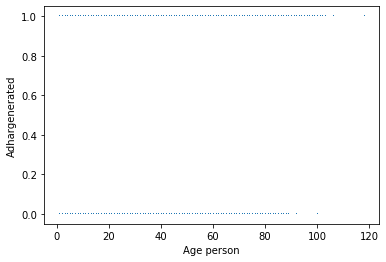

In [10]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df['Age'], pd_df['Aadhaar generated'], ',')
plt.xlabel('Age person')
plt.ylabel('Adhargenerated')
display()

In [11]:
df.groupBy('State').count().show()

+--------------------+-----+
|               State|count|
+--------------------+-----+
|            Nagaland|  392|
|           Karnataka|15755|
|              Odisha|11972|
|              Kerala|12378|
|          Tamil Nadu|21196|
|        Chhattisgarh| 4617|
|      Andhra Pradesh| 4540|
|         Lakshadweep|    5|
|      Madhya Pradesh|37360|
|              Punjab| 5888|
|             Manipur|  562|
|                 Goa|  799|
|             Mizoram| 3172|
|Dadra and Nagar H...|  107|
|    Himachal Pradesh| 1283|
|          Puducherry|   85|
|             Haryana| 5138|
|   Jammu and Kashmir| 1331|
|           Jharkhand| 7423|
|   Arunachal Pradesh|  632|
+--------------------+-----+
only showing top 20 rows



In [12]:
df.describe().show()

+-------+--------------------+--------------------+--------------------+---------+------------+------------------+------+------------------+------------------+-------------------+-------------------------+---------------------------------+
|summary|           Registrar|    Enrolment Agency|               State| District|Sub District|          Pin Code|Gender|               Age| Aadhaar generated| Enrolment Rejected|Residents providing email|Residents providing mobile number|
+-------+--------------------+--------------------+--------------------+---------+------------+------------------+------+------------------+------------------+-------------------+-------------------------+---------------------------------+
|  count|              440818|              440818|              440818|   440818|      440818|            440818|440818|            440818|            440818|             440818|                   440818|                           440818|
|   mean|                null|          

In [13]:
def prepare_plot_area(ax):
    # Remove plot frame lines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False) 
    
    # X and y ticks on bottom and left
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 

In [14]:
colrcode = [(31, 119, 180), (255, 127, 14),\
             (44, 160, 44), (214, 39, 40), \
             (148, 103, 189),  (140, 86, 75), \
             (227, 119, 194), (127, 127, 127), \
             (188, 189, 34), (23, 190, 207)]

In [15]:
for i in range(len(colrcode)):  
    r, g, b = colrcode[i]  
    colrcode[i] = (r / 255., g / 255., b / 255.)

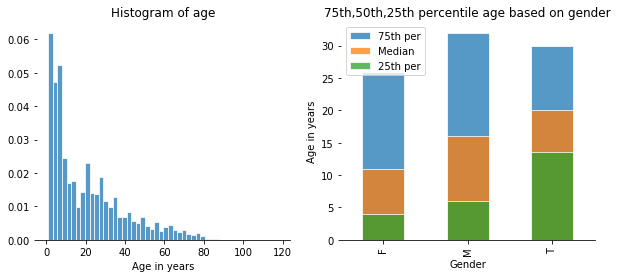

In [16]:
fig,axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)
plt.sca(axes[0])
p = plt.hist(pd_df[pd_df['Age'].notnull()]['Age'], 50, normed=1, facecolor=colrcode[0], edgecolor = [1,1,1], alpha=0.75)
plt.title('Histogram of age')
plt.xlabel('Age in years')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
g = pd_df.groupby('Gender')['Age'].quantile(.75)
g2 = pd_df.groupby('Gender')['Age'].median()
g3 = pd_df.groupby('Gender')['Age'].quantile(.25)
g.plot(kind = 'bar',color = colrcode[0],label = '75th per',edgecolor = [1,1,1], alpha=0.75)
g2.plot(kind = 'bar',color = colrcode[1],label = 'Median',edgecolor = [1,1,1], alpha=0.75)
g3.plot(kind = 'bar',color = colrcode[2],label = '25th per',edgecolor = [1,1,1], alpha=0.75)
plt.title('75th,50th,25th percentile age based on gender')
plt.ylabel('Age in years')
plt.xlabel('Gender')
plt.xticks([0,1,2],['F','M','T'])
l = plt.legend(loc='upper left')
prepare_plot_area(plt.gca())   

The p value is  0.0


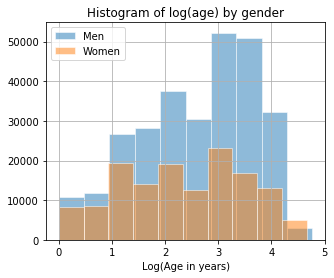

In [17]:
import scipy as sp

fig = plt.figure(figsize=(5, 4))
np.log(pd_df[(pd_df['Gender']==1)&(pd_df['Age'].notnull())]['Age']).hist(alpha = 0.5,label = 'Men',edgecolor = [1,1,1])
np.log(pd_df[(pd_df['Gender']==0)&(pd_df['Age'].notnull())]['Age']).hist(alpha = 0.5,label = 'Women',edgecolor = [1,1,1])
plt.legend(loc = 'best')
plt.title('Histogram of log(age) by gender')
plt.xlabel('Log(Age in years)') 
## t-test
t,p_val = sp.stats.ttest_ind(np.log(pd_df[(pd_df['Gender']==0)&(pd_df['Age'].notnull())]['Age']),np.log(pd_df[(pd_df['Gender']==1)&(pd_df['Age'].notnull())]['Age']),equal_var = False)
print('The p value is ',p_val)

In [18]:
perM = np.around(pd_df[pd_df['Gender']== 1]['Gender'].sum()/pd_df['Gender'].count()*100,2)
perF = np.around(pd_df[pd_df['Gender']== 0]['Gender'].count()/pd_df['Gender'].count()*100,2)
perT = np.around(pd_df[pd_df['Gender']== 2]['Gender'].count()/pd_df['Gender'].count()*100,2)
print("Percentage man :" , perM )
print("Percentage woman :" , perF )
print("Percentage trans :" , perT )

Percentage man : 66.42
Percentage woman : 33.58
Percentage trans : 0.0


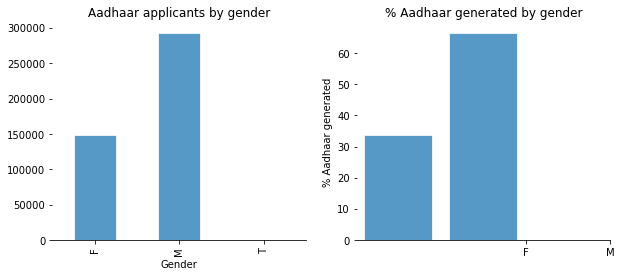

In [19]:
fig,axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)
plt.sca(axes[0])
g = pd_df.groupby('Gender')['Aadhaar generated'].count()
g.plot(kind = 'bar',color = colrcode[0],alpha = 0.75,edgecolor = [1,1,1])
plt.title('Aadhaar applicants by gender')
plt.xticks([0,1,2],['F','M','T'])
prepare_plot_area(plt.gca())
plt.sca(axes[1])
plt.bar(['F','M'],[perF,perM],color = colrcode[0],alpha = 0.75,edgecolor = [1,1,1])
plt.xticks([1.5,2.5],['F','M'])
plt.title('% Aadhaar generated by gender')
plt.ylabel('% Aadhaar generated')
prepare_plot_area(plt.gca())


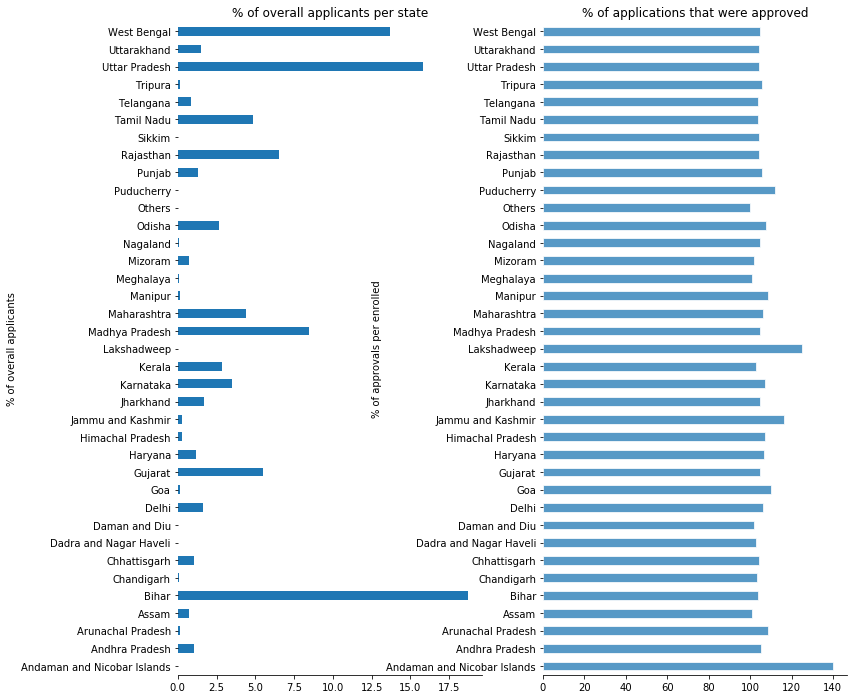

In [20]:
d = pd_df.groupby('State')['Aadhaar generated'].sum()
c = pd_df.groupby('State')['Aadhaar generated'].count()
perc_gen_per_state = c/d*100
perc_total =  d/d.sum()*100
fig,axes = plt.subplots(figsize = (12,12),nrows = 1,ncols =2)
plt.sca(axes[0])
perc_total.plot(kind = 'barh')
plt.ylabel('% of overall applicants')
plt.title('% of overall applicants per state')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
perc_gen_per_state.plot(kind = 'barh',color = colrcode[0],edgecolor = [1,1,1],alpha=  0.75)
plt.ylabel('% of approvals per enrolled')
plt.title('% of applications that were approved')
prepare_plot_area(plt.gca())

In [21]:
statesPop = {'Maharashtra':112372972,'West Bengal':91347736,\
              'Tamil Nadu':72138958,'Andhra Pradesh':49386799,\
              'Karnataka':61130704,'Kerala':33387677,'Madhya Pradesh':72597565,\
              'Gujarat':60383628,'Chhattisgarh':135191,'Odisha':41947358,\
              'Rajasthan':68621012,'Uttar Pradesh':207281477,'Assam':31169272,\
              'Haryana':25540196,'Delhi':18980000,'Jharkhand':32966238,\
              'Punjab':27704236,'Bihar':103804637,'Tripura':3671032,'Puducherry':1244464,\
              'Himachal Pradesh':6864602,'Uttarakhand':10116752,'Goa':1457723,\
              'Jammu and Kashmir':12548926,'Sikkim':607688,'Andaman and Nicobar Islands':379944,\
              'Arunachal Pradesh':1382611,'Meghalaya':2964007,\
              'Chandigarh':1055450,'Mizoram':1091014,'Dadra and Nagar Haveli':342853,\
              'Manipur':2721756,'Nagaland':1980602,'Daman and Diu':242911,\
              'Lakshadweep':64429,'Telangana' :35286757}

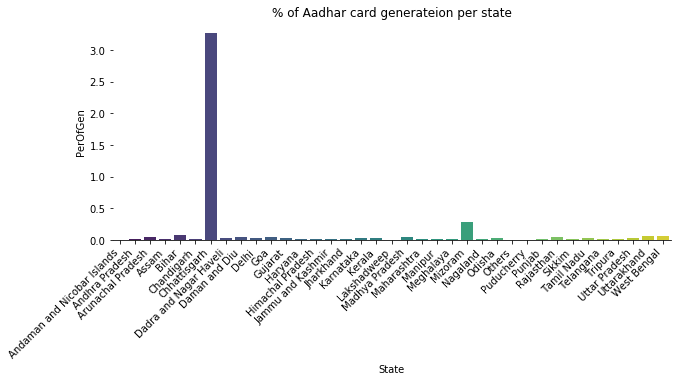

In [22]:
fig = plt.figure(figsize=(10, 4))
g = pd_df.groupby(['State'],as_index=False)['Aadhaar generated'].sum()

for state in statesPop.keys():
    g.loc[g['State']==state,'Population'] = statesPop[state]
   
g['PerOfGen'] = g['Aadhaar generated']*100/g['Population']    
sns.barplot(x='State',y='PerOfGen',data=g,palette='viridis')
plt.title('% of Aadhar card generateion per state')
plt.xticks(rotation=45,ha='right')
prepare_plot_area(plt.gca())

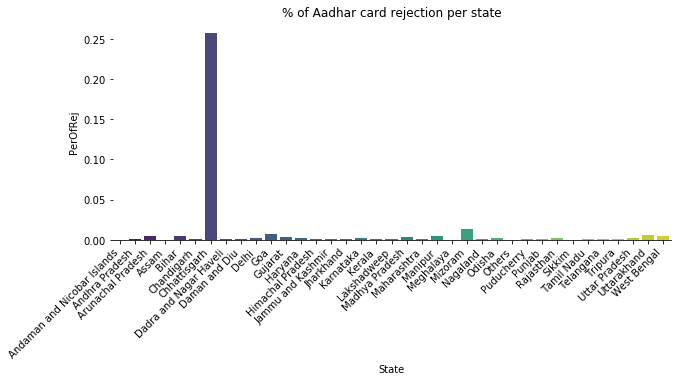

In [23]:
fig = plt.figure(figsize=(10, 4))
g = pd_df.groupby(['State'],as_index=False)['Enrolment Rejected'].sum()
for state in statesPop.keys():
    g.loc[g['State']==state,'Population'] = statesPop[state]
   
g['PerOfRej'] = g['Enrolment Rejected']*100/g['Population']    
sns.barplot(x='State',y='PerOfRej',data=g,palette='viridis')
plt.title('% of Aadhar card rejection per state')
plt.xticks(rotation=45,ha='right')
prepare_plot_area(plt.gca())

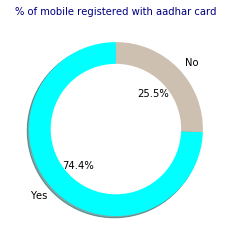

In [24]:
xyz=pd_df['Residents providing mobile number'].sum() 
cnt=pd_df['State'].count()  
labels=['Yes','No']
data=[xyz,cnt-xyz]
fig = plt.figure(figsize=(5, 4))
plt.pie(data,labels =labels,shadow = True,startangle = 90, autopct='%1.1f%%',colors = ['#00FFFF','#CDC0B0'])
plt.title("% of mobile registered with aadhar card",fontsize=10,color='navy')
centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

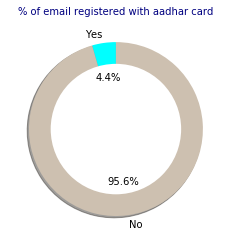

In [25]:
xyz=pd_df['Residents providing email'].sum() 
cnt=pd_df['State'].count()  
labels=['Yes','No']
data=[xyz,cnt-xyz]
fig = plt.figure(figsize=(5, 4))
plt.pie(data,labels =labels,shadow = True,startangle = 90, autopct='%1.1f%%',colors = ['#00FFFF','#CDC0B0'])
plt.title("% of email registered with aadhar card",fontsize=10,color='navy')
centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

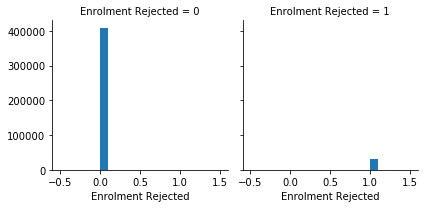

In [26]:
import seaborn as sns
g = sns.FacetGrid(pd_df, col="Enrolment Rejected")
g.map(plt.hist, "Enrolment Rejected")

In [27]:
df.describe().show()

+-------+--------------------+--------------------+--------------------+---------+------------+------------------+------+------------------+------------------+-------------------+-------------------------+---------------------------------+
|summary|           Registrar|    Enrolment Agency|               State| District|Sub District|          Pin Code|Gender|               Age| Aadhaar generated| Enrolment Rejected|Residents providing email|Residents providing mobile number|
+-------+--------------------+--------------------+--------------------+---------+------------+------------------+------+------------------+------------------+-------------------+-------------------------+---------------------------------+
|  count|              440818|              440818|              440818|   440818|      440818|            440818|440818|            440818|            440818|             440818|                   440818|                           440818|
|   mean|                null|          

In [28]:
pd_df['Enrolment Rejected'].value_counts()

0    409275
1     31543
Name: Enrolment Rejected, dtype: int64

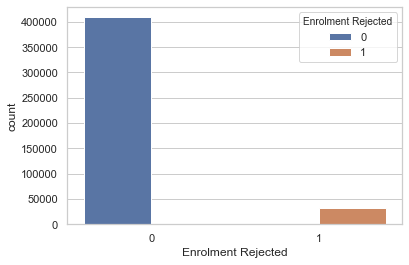

In [29]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="Enrolment Rejected", hue= "Enrolment Rejected", data=pd_df)

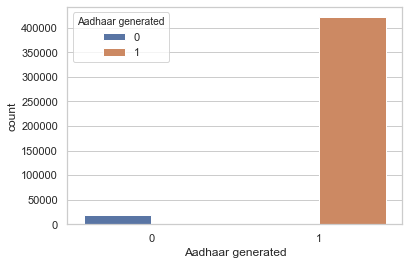

In [30]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="Aadhaar generated", hue= "Aadhaar generated", data=pd_df)

In [31]:
pd_df['State']= pd_df['State'].astype('category')
#sns.countplot(x="Aadhaar generated", hue= "State", data=pd_df)

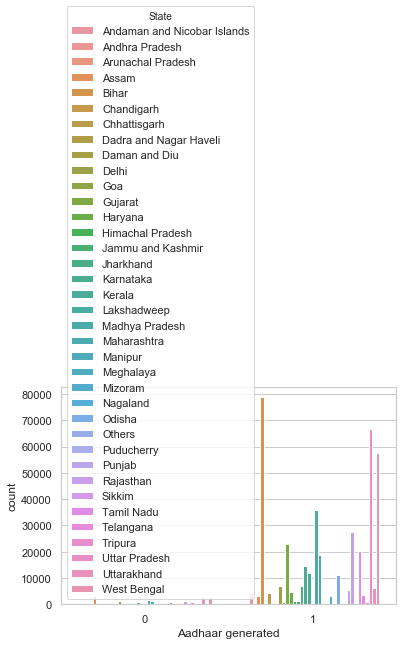

In [32]:
sns.countplot(x="Aadhaar generated", hue= "State", data=pd_df)

In [33]:
pd_df['Registrar'].value_counts()

CSC e-Governance Services India Limited                                       209771
NSDL e-Governance Infrastructure Limited                                       54214
DENA BANK                                                                      33869
Bank Of India                                                                  19791
Madhya Pradesh State Electronics Development Corporation Ltd.                  17309
Tamil Nadu eGovernance Agency                                                  15468
Govt of Gujarat                                                                13894
Dept of ITC Govt of Rajasthan                                                  13565
Govt of Kerala                                                                 11937
Union Bank                                                                      5536
Govt of Karnataka                                                               5330
Rural Development Dept  Govt. of Bihar                           

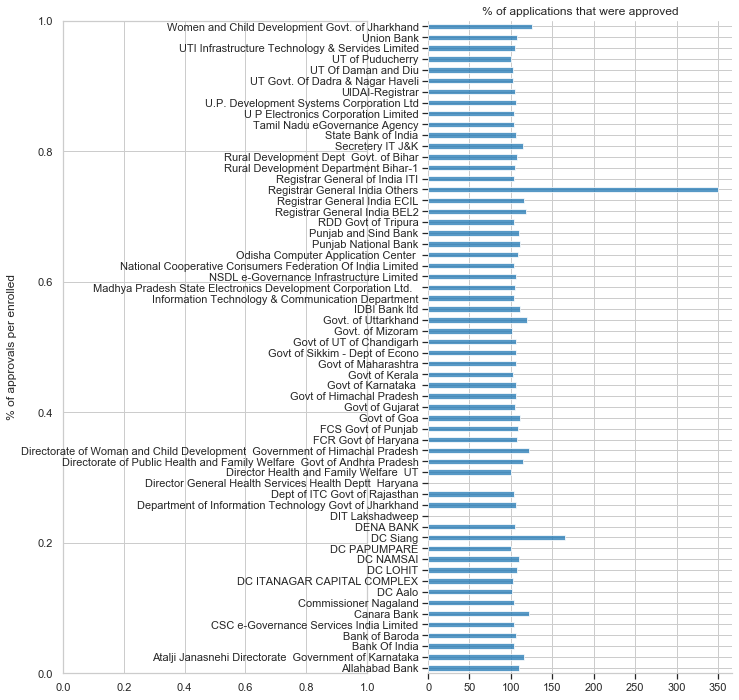

In [34]:
d = pd_df.groupby('Registrar')['Aadhaar generated'].sum()
c = pd_df.groupby('Registrar')['Aadhaar generated'].count()
perc_gen_per_state = c/d*100
perc_total =  d/d.sum()*100
fig,axes = plt.subplots(figsize = (12,12),nrows = 1,ncols =2)
#plt.sca(axes[0])
#perc_total.plot(kind = 'barh')
#plt.ylabel('% of overall applicants')
#plt.title('% of overall applicants per state')
#prepare_plot_area(plt.gca())

plt.sca(axes[1])
perc_gen_per_state.plot(kind = 'barh',color = colrcode[0],edgecolor = [1,1,1],alpha=  0.75)
plt.ylabel('% of approvals per enrolled')
plt.title('% of applications that were approved')
prepare_plot_area(plt.gca())

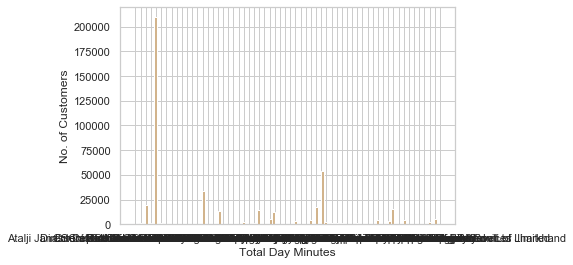

In [35]:
plt.hist(pd_df['Registrar'], bins= 100, facecolor= 'tan')
plt.xlabel('Total Day Minutes')
plt.ylabel('No. of Customers')
plt.show()

In [36]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer,VectorAssembler


In [37]:
df1 = df.drop(*['Pin Code', 'Residents providing email', 'Residents providing mobile number' , 'State' ,'Enrolment Rejected'])
df1.columns

['Registrar',
 'Enrolment Agency',
 'District',
 'Sub District',
 'Gender',
 'Age',
 'Aadhaar generated']

In [38]:
df1.show()

+--------------------+--------------------+----------+------------+------+---+-----------------+
|           Registrar|    Enrolment Agency|  District|Sub District|Gender|Age|Aadhaar generated|
+--------------------+--------------------+----------+------------+------+---+-----------------+
|      Allahabad Bank|A-Onerealtors Pvt...| Allahabad|        Meja|     F|  7|                1|
|      Allahabad Bank|Asha Security Gua...| Sonbhadra| Robertsganj|     M|  8|                1|
|      Allahabad Bank|   SGS INDIA PVT LTD| Sultanpur|   Sultanpur|     F| 13|                1|
|      Allahabad Bank|Sri Ramraja Sarka...|    Shamli|      Shamli|     M|  6|                1|
|      Allahabad Bank|  Transmoovers India| Gorakhpur|    Sahjanwa|     M|  8|                1|
|      Allahabad Bank|  Transmoovers India|  Varanasi|      Pindra|     M| 14|                1|
|      Allahabad Bank|  Transmoovers India|  Varanasi|    Varanasi|     M|  9|                1|
|      Allahabad Bank|  Transm

In [59]:
categoricalCols = ['Registrar',
 'Enrolment Agency',
 'District',
 'Sub District',
 'Gender']
numericCols = ['Age',
 'Aadhaar generated']
stages = []

In [63]:
from pyspark.ml import Pipeline

cols = df1.columns

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df1)
piped_data = pipelineModel.transform(df1)
selectedCols = ['label', 'features'] + cols
piped_data = piped_data.select(selectedCols)

AnalysisException: cannot resolve '`label`' given input columns: [Aadhaar generated, Age, District, Enrolment Agency, Gender, Registrar, Sub District];;
'Project ['label, 'features, Registrar#16, Enrolment Agency#17, District#19, Sub District#20, Gender#22, Age#23, Aadhaar generated#24]
+- Project [Registrar#16, Enrolment Agency#17, District#19, Sub District#20, Gender#22, Age#23, Aadhaar generated#24]
   +- Relation[Registrar#16,Enrolment Agency#17,State#18,District#19,Sub District#20,Pin Code#21,Gender#22,Age#23,Aadhaar generated#24,Enrolment Rejected#25,Residents providing email#26,Residents providing mobile number#27] csv


In [40]:
transformed = transformed.drop(*['Registrar', 'Enrolment Agency', 'District', 'Sub District', 'Gender' ,'State','Enrolment Rejected'])
transformed.columns

['Age',
 'Aadhaar generated',
 'Registrar_indexed',
 'Enrolment Agency_indexed',
 'District_indexed',
 'Sub District_indexed',
 'Gender_indexed',
 'Registrar_indexed_encoded',
 'Enrolment Agency_indexed_encoded',
 'District_indexed_encoded',
 'Sub District_indexed_encoded',
 'Gender_indexed_encoded',
 'features']

In [41]:
from pyspark.sql.functions import col

ff = transformed.select(col("Aadhaar generated").alias("label"))
ff.show()

+-----+
|label|
+-----+
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    0|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
+-----+
only showing top 20 rows



In [42]:
transformed.show()

+---+-----------------+-----------------+------------------------+----------------+--------------------+--------------+-------------------------+--------------------------------+------------------------+----------------------------+----------------------+--------------------+
|Age|Aadhaar generated|Registrar_indexed|Enrolment Agency_indexed|District_indexed|Sub District_indexed|Gender_indexed|Registrar_indexed_encoded|Enrolment Agency_indexed_encoded|District_indexed_encoded|Sub District_indexed_encoded|Gender_indexed_encoded|            features|
+---+-----------------+-----------------+------------------------+----------------+--------------------+--------------+-------------------------+--------------------------------+------------------------+----------------------------+----------------------+--------------------+
|  7|                1|             55.0|                    53.0|            22.0|               157.0|           1.0|          (60,[55],[1.0])|                (325,[53

In [43]:
df2 = transformed.join(ff)
df2.show()


+---+-----------------+-----------------+------------------------+----------------+--------------------+--------------+-------------------------+--------------------------------+------------------------+----------------------------+----------------------+--------------------+-----+
|Age|Aadhaar generated|Registrar_indexed|Enrolment Agency_indexed|District_indexed|Sub District_indexed|Gender_indexed|Registrar_indexed_encoded|Enrolment Agency_indexed_encoded|District_indexed_encoded|Sub District_indexed_encoded|Gender_indexed_encoded|            features|label|
+---+-----------------+-----------------+------------------------+----------------+--------------------+--------------+-------------------------+--------------------------------+------------------------+----------------------------+----------------------+--------------------+-----+
|  7|                1|             55.0|                    53.0|            22.0|               157.0|           1.0|          (60,[55],[1.0])|      

In [44]:
df3 = df2.select(*['label'])
df3.show()

+-----+
|label|
+-----+
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
+-----+
only showing top 20 rows



In [45]:
from pyspark.sql.functions import array
df3 = df3.withColumn("label", array("label")).show()

+-----+
|label|
+-----+
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
|  [1]|
+-----+
only showing top 20 rows



In [46]:
transformed = df2.drop(*['Aadhaar generated' , 'label'])
transformed.columns

['Age',
 'Registrar_indexed',
 'Enrolment Agency_indexed',
 'District_indexed',
 'Sub District_indexed',
 'Gender_indexed',
 'Registrar_indexed_encoded',
 'Enrolment Agency_indexed_encoded',
 'District_indexed_encoded',
 'Sub District_indexed_encoded',
 'Gender_indexed_encoded',
 'features']

In [47]:
transformed.show()

+---+-----------------+------------------------+----------------+--------------------+--------------+-------------------------+--------------------------------+------------------------+----------------------------+----------------------+--------------------+
|Age|Registrar_indexed|Enrolment Agency_indexed|District_indexed|Sub District_indexed|Gender_indexed|Registrar_indexed_encoded|Enrolment Agency_indexed_encoded|District_indexed_encoded|Sub District_indexed_encoded|Gender_indexed_encoded|            features|
+---+-----------------+------------------------+----------------+--------------------+--------------+-------------------------+--------------------------------+------------------------+----------------------------+----------------------+--------------------+
|  7|             55.0|                    53.0|            22.0|               157.0|           1.0|          (60,[55],[1.0])|                (325,[53],[1.0])|        (664,[22],[1.0])|          (5340,[157],[1.0])|         

In [48]:
pd.DataFrame(transformed.take(5), columns=transformed.columns).transpose()

,0,1,2,3,4
Age,7,7,7,7,7
Registrar_indexed,55,55,55,55,55
Enrolment Agency_indexed,53,53,53,53,53
District_indexed,22,22,22,22,22
Sub District_indexed,157,157,157,157,157
Gender_indexed,1,1,1,1,1
Registrar_indexed_encoded,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Enrolment Agency_indexed_encoded,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
District_indexed_encoded,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Sub District_indexed_encoded,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [49]:
df2.show()

+---+-----------------+-----------------+------------------------+----------------+--------------------+--------------+-------------------------+--------------------------------+------------------------+----------------------------+----------------------+--------------------+-----+
|Age|Aadhaar generated|Registrar_indexed|Enrolment Agency_indexed|District_indexed|Sub District_indexed|Gender_indexed|Registrar_indexed_encoded|Enrolment Agency_indexed_encoded|District_indexed_encoded|Sub District_indexed_encoded|Gender_indexed_encoded|            features|label|
+---+-----------------+-----------------+------------------------+----------------+--------------------+--------------+-------------------------+--------------------------------+------------------------+----------------------------+----------------------+--------------------+-----+
|  7|                1|             55.0|                    53.0|            22.0|               157.0|           1.0|          (60,[55],[1.0])|      

In [50]:
piped_data = df2.select('features', 'label')
piped_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: integer (nullable = true)



In [51]:
train, test = piped_data.randomSplit([0.8, 0.2], seed=42)

In [52]:
train, validation = train.randomSplit([0.8, 0.2], seed=42)

In [53]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [ ]:
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', 
                        maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(train)